In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 5s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

Decode the integer sequence back into sentences

In [8]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# decode the review, note that indices are offset by 3 
# because 0, 1, 2 are reserved for padding, stat of sequence and unknown

decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Encode the integer sequence to binary matrix

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # create zero matrix of size seq * dim
    results = np.zeros((len(sequences), dimension))
    
    for i, seq in enumerate(sequences):
        results[i, seq] = 1
        
    return results

In [12]:
# vectorized training data
x_train = vectorize_sequences(train_data)
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
# vectorized train data
x_test = vectorize_sequences(test_data)
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

## encoding the labels

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### define models

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### compile

In [16]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.01), 
              loss=losses.binary_crossentropy, 
              metrics=[metrics.binary_accuracy])

### setting aside a validation set

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### training out model

In [20]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.1645 - binary_accuracy: 0.9383 - val_loss: 0.3136 - val_binary_accuracy: 0.8802
Epoch 2/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1388 - binary_accuracy: 0.9480 - val_loss: 0.3289 - val_binary_accuracy: 0.8860
Epoch 3/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.0957 - binary_accuracy: 0.9630 - val_loss: 0.3705 - val_binary_accuracy: 0.8803
Epoch 4/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.0704 - binary_accuracy: 0.9733 - val_loss: 0.4313 - val_binary_accuracy: 0.8804
Epoch 5/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.0638 - binary_accuracy: 0.9789 - val_loss: 0.5025 - val_binary_accuracy: 0.8771
Epoch 6/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.0250 - binary_accuracy: 0.9913 - val_loss: 0.6932 - val_bi

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

### plotting the training and validation losses

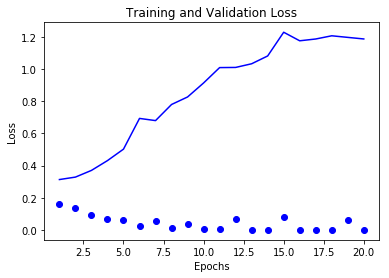

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline                               


acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend
plt.show()

## plotting training and validation accuracy

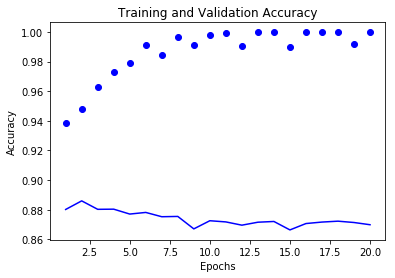

In [25]:
plt.clf()

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend
plt.show()


## one-hot encoding the labels, the keras way

In [26]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)

In [27]:
one_hot_train_labels

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

- Regression is done using different loss functions from classification; Mean Squared Error
(MSE) is a commonly used loss function for regression.
- Similarly, evaluation metrics to be used for regression differ from those used for
classification; naturally the concept of "accuracy" does not apply for regression. A
common regression metric is Mean Absolute Error (MAE).
- When features in the input data have values in different ranges, each feature should be
scaled independently as a preprocessing step.
- When there is little data available, using K-Fold validation is a great way to reliably
evaluate a model.
- When little training data is available, it is preferable to use a small network with very few
hidden layers (typically only one or two), in order to avoid severe overfitting.

## Regularization

1. L1 regularization, where the cost added is proportional to the absolute value of the
weights coefficients (i.e. to what is called the "L1 norm" of the weights).
2. L2 regularization, where the cost added is proportional to the square of the value of the
weights coefficients (i.e. to what is called the "L2 norm" of the weights). L2
regularization is also called weight decay in the context of neural networks. Don’t let the
different name confuse you: weight decay is mathematically the exact same as L2
regularization.

In [29]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                      activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                      activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Different weight regularizers

In [30]:
from keras import regularizers
# L1 regularization
regularizers.l1(0.001)
# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## Dropouts

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='softmax'))

### Regularize your model

- Add dropout.
- Try different architectures, add or remove layers.
- Add L1 / L2 regularization.
- Try different hyperparameters (such as the number of units per layer, the learning rate of
the optimizer) to find the optimal configuration.
- Optionally iterate on feature engineering: add new features, remove features that do not
seem to be informative.